# Importing Required Libraries

In [1]:
# Basic data and visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
)

# For cleaner output
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
df = pd.read_csv("..\\Datasets\\diabetes.csv")
print(f"Dataset loaded to dataframe df having dimensions {df.shape}")

Dataset loaded to dataframe df having dimensions (768, 9)


# Exploring Dataset

## Dimensions and Size

In [3]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}\nTotal No. of Cells : {df.size}")

No. of Rows : 768
No. of Columns : 9
Total No. of Cells : 6912


## Displaying Sample Rows

In [4]:
print("Top 5 rows")
display(df.head())

Top 5 rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("Last 5 rows")
display(df.tail())

Last 5 rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print("Randomly selected 5 rows")
display(df.sample(5))

Randomly selected 5 rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
261,3,141,0,0,0,30.0,0.761,27,1
227,3,162,52,38,0,37.2,0.652,24,1
731,8,120,86,0,0,28.4,0.259,22,1
610,3,106,54,21,158,30.9,0.292,24,0
584,8,124,76,24,600,28.7,0.687,52,1


## Metadata

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

## Statistical Summary

In [8]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing

## Handling NULL Values

In [9]:
print(f"NULL values per column : \n{df.isnull().sum()}\nTotal NULL Values : {df.isnull().sum().sum()}")

NULL values per column : 
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
Total NULL Values : 0


## Checking Datatypes Compatibility

In [10]:
print("Before Datatype Conversion")
display(df.dtypes)

Before Datatype Conversion


Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

# EDA

## Outcome Distribution

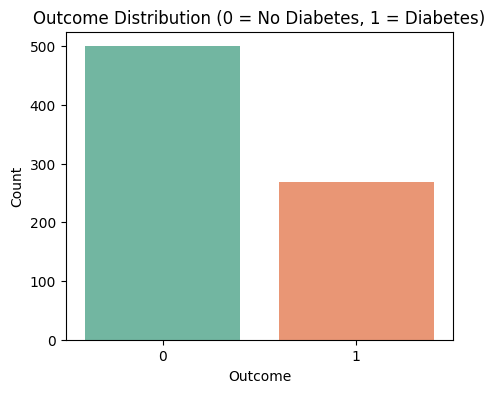

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [11]:
# Count of diabetic (1) vs non-diabetic (0)
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Outcome Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

print(df['Outcome'].value_counts(normalize=True))

## Key Feature Relationships

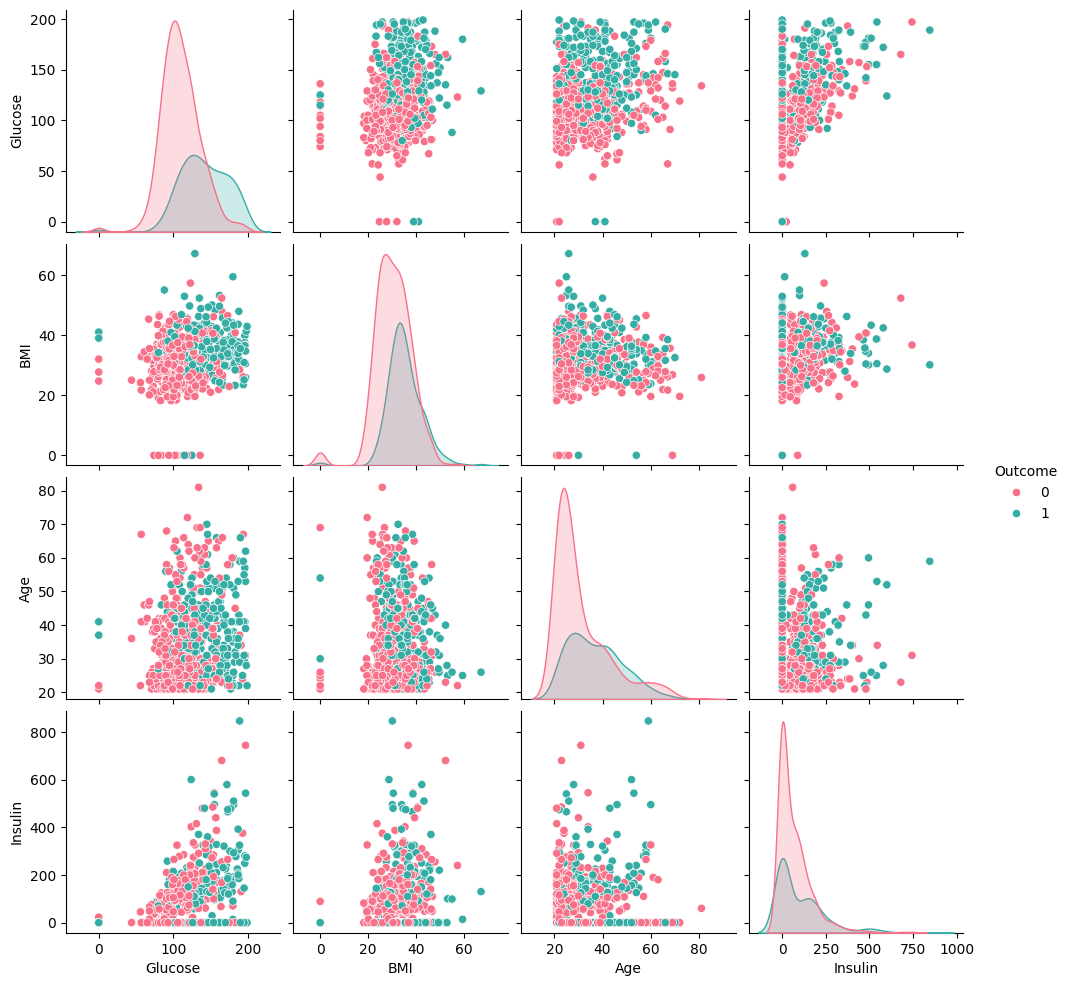

In [12]:
# Pairwise relationship for selected important features
important_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(df[important_features], hue='Outcome', palette='husl', diag_kind='kde')
plt.show()

## Correlation HeatMap

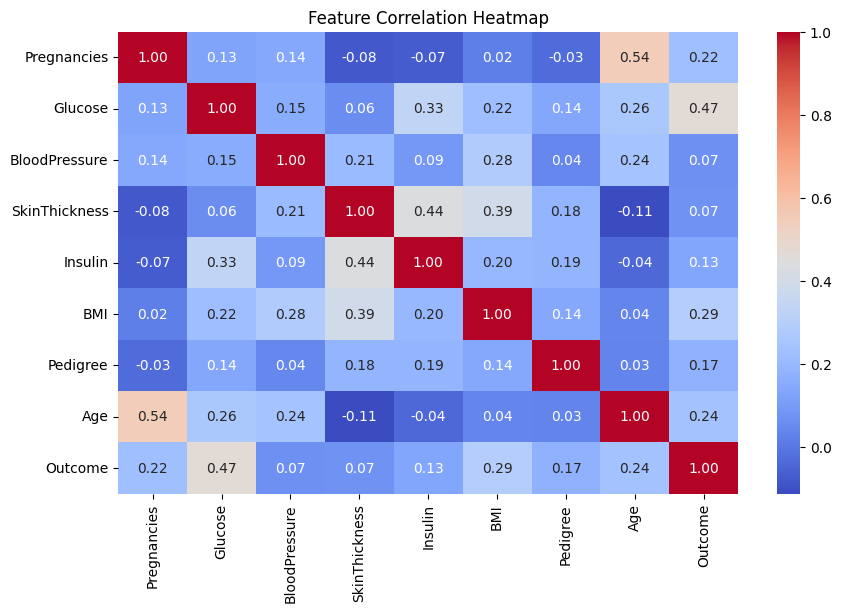


Correlation of features with Outcome:
 Outcome          1.000000
Glucose          0.466581
BMI              0.292695
Age              0.238356
Pregnancies      0.221898
Pedigree         0.173844
Insulin          0.130548
SkinThickness    0.074752
BloodPressure    0.065068
Name: Outcome, dtype: float64


In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Most correlated features with Outcome
corr_target = df.corr()['Outcome'].sort_values(ascending=False)
print("\nCorrelation of features with Outcome:\n", corr_target)

# Training Data Preparation

## Feature and Target Separation

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (768, 8)
Target shape: (768,)


## Standardization and Train-Test Split

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 576
Testing samples: 192


# Train Base KNN Model (Default k)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate Base Model Performance

Confusion Matrix:
 [[101  24]
 [ 33  34]]

Accuracy:  0.703
Error Rate: 0.297
Precision:  0.586
Recall:     0.507


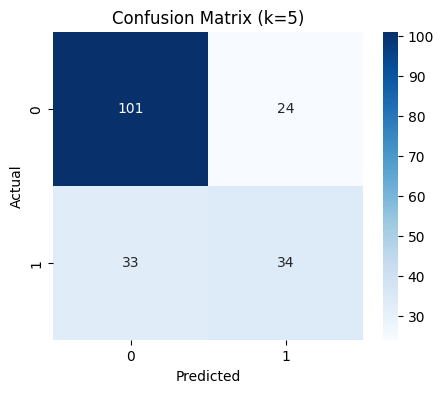


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       125
           1       0.59      0.51      0.54        67

    accuracy                           0.70       192
   macro avg       0.67      0.66      0.66       192
weighted avg       0.70      0.70      0.70       192



In [17]:
# Compute confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
err = 1 - acc

print("Confusion Matrix:\n", cm)
print(f"\nAccuracy:  {acc:.3f}")
print(f"Error Rate: {err:.3f}")
print(f"Precision:  {prec:.3f}")
print(f"Recall:     {rec:.3f}")

# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (k=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Methods to Find Optimal Value of K

## Method 1: Error Rate vs k (Elbow-style for KNN)

Minimum Error Rate: 0.234 at k = 16
Corresponding Accuracy: 0.766


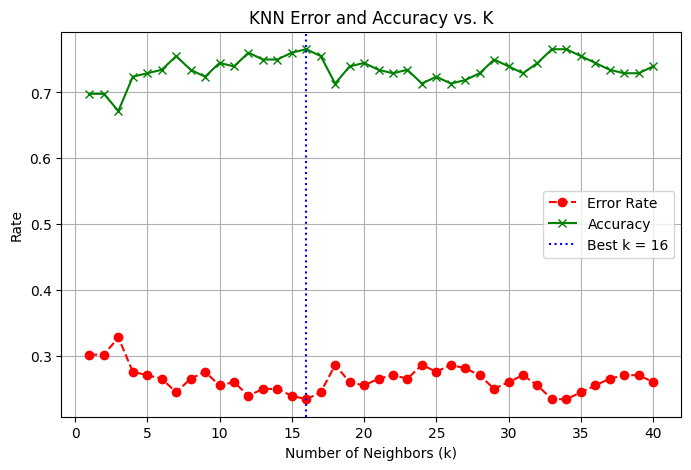

In [18]:
error_rate = []
acc_values = []

# Test for k = 1 to 40
for k in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))
    acc_values.append(accuracy_score(y_test, pred_k))

# Find the k with minimum error rate (maximum accuracy)
min_error = min(error_rate)
best_k = error_rate.index(min_error) + 1 
best_acc = acc_values[best_k - 1]

print(f"Minimum Error Rate: {min_error:.3f} at k = {best_k}")
print(f"Corresponding Accuracy: {best_acc:.3f}")

# Plot error vs k
plt.figure(figsize=(8,5))
plt.plot(range(1,41), error_rate, color='red', linestyle='--', marker='o', label='Error Rate')
plt.plot(range(1,41), acc_values, color='green', marker='x', label='Accuracy')
plt.axvline(best_k, color='blue', linestyle=':', label=f'Best k = {best_k}')
plt.title('KNN Error and Accuracy vs. K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()


## Method 2: GridSearchCV for Optimal k

Best k from GridSearchCV: 29
Best cross-validation accuracy: 0.7586656671664168

Test Accuracy with k=29: 0.7500


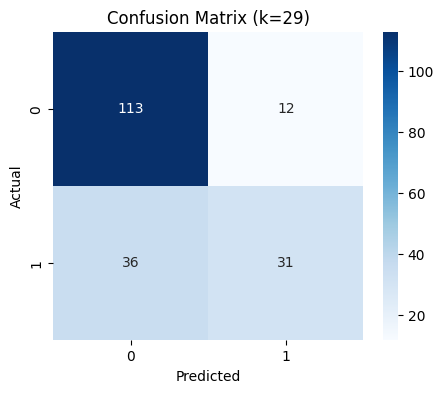


Classification Report:
               precision    recall  f1-score   support

           0     0.7584    0.9040    0.8248       125
           1     0.7209    0.4627    0.5636        67

    accuracy                         0.7500       192
   macro avg     0.7397    0.6833    0.6942       192
weighted avg     0.7453    0.7500    0.7337       192



In [20]:
param_grid = {'n_neighbors': np.arange(1, 41)}

# 5-fold cross-validation Grid Search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Show best result
print("Best k from GridSearchCV:", grid.best_params_['n_neighbors'])
print("Best cross-validation accuracy:", grid.best_score_)

# Train final KNN with best k on full training set
knn_final = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], metric='manhattan')
knn_final.fit(X_train, y_train)

# Predict on test set
y_test_pred = knn_final.predict(X_test)

# Calculate test accuracy and other metrics
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy with k={grid.best_params_['n_neighbors']}: {test_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (k={grid.best_params_['n_neighbors']})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, digits=4))

## Method 3: RandomizedSearchCV for Optimal k

Best k from RandomizedSearchCV: 20
Best cross-validation accuracy: 0.7551874062968515

Test Accuracy with k=20: 0.7448


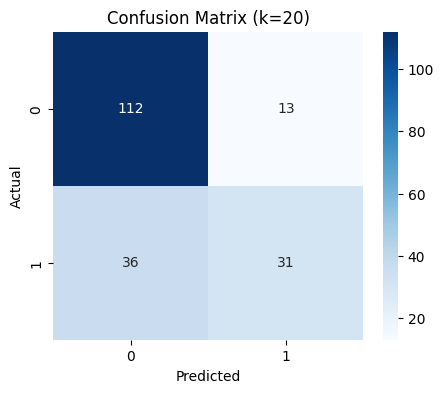


Classification Report:
               precision    recall  f1-score   support

           0     0.7568    0.8960    0.8205       125
           1     0.7045    0.4627    0.5586        67

    accuracy                         0.7448       192
   macro avg     0.7307    0.6793    0.6895       192
weighted avg     0.7385    0.7448    0.7291       192



In [21]:
param_dist = {'n_neighbors': np.arange(1, 41)}
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=10,  # number of random samples to test
    cv=5,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best k from RandomizedSearchCV:", random_search.best_params_['n_neighbors'])
print("Best cross-validation accuracy:", random_search.best_score_) 

knn_final = KNeighborsClassifier(n_neighbors=random_search.best_params_['n_neighbors'], metric='manhattan')
knn_final.fit(X_train, y_train)

# Predict on test set
y_test_pred = knn_final.predict(X_test)

# Calculate test accuracy and other metrics
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy with k={random_search.best_params_['n_neighbors']}: {test_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (k={random_search.best_params_['n_neighbors']})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, digits=4))

# Final Model Using Optimal K


Final Model Performance (k = 16):
Confusion Matrix:
 [[113  12]
 [ 33  34]]

Accuracy:  0.766
Error Rate: 0.234
Precision:  0.739
Recall:     0.507


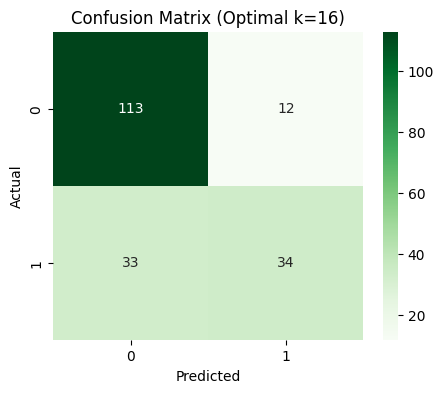

In [22]:
best_k = 16
knn_best = KNeighborsClassifier(n_neighbors=16, metric='manhattan')
knn_best.fit(X_train, y_train)
y_best = knn_best.predict(X_test)

# Metrics
cm_best = confusion_matrix(y_test, y_best)
acc_best = accuracy_score(y_test, y_best)
prec_best = precision_score(y_test, y_best)
rec_best = recall_score(y_test, y_best)
err_best = 1 - acc_best

print("\nFinal Model Performance (k = {}):".format(best_k))
print("Confusion Matrix:\n", cm_best)
print(f"\nAccuracy:  {acc_best:.3f}")
print(f"Error Rate: {err_best:.3f}")
print(f"Precision:  {prec_best:.3f}")
print(f"Recall:     {rec_best:.3f}")

plt.figure(figsize=(5,4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix (Optimal k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparing Distance Metric

In [23]:
# Compare multiple distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

results = []

for metric in distance_metrics:
    knn_temp = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn_temp.fit(X_train, y_train)
    y_temp = knn_temp.predict(X_test)

    acc = accuracy_score(y_test, y_temp)
    prec = precision_score(y_test, y_temp)
    rec = recall_score(y_test, y_temp)
    err = 1 - acc

    results.append({
        'Metric': metric,
        'Accuracy': round(acc, 3),
        'Error Rate': round(err, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3)
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(results)
print("\nDistance Metric Comparison:\n")
print(comparison_df)


Distance Metric Comparison:

      Metric  Accuracy  Error Rate  Precision  Recall
0  euclidean     0.719       0.281      0.651   0.418
1  manhattan     0.766       0.234      0.739   0.507
2  minkowski     0.719       0.281      0.651   0.418


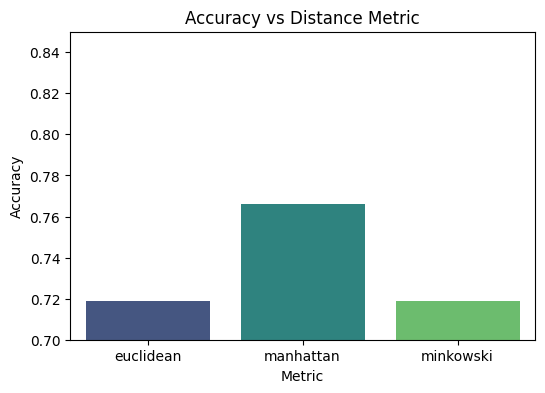

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x='Metric', y='Accuracy', data=comparison_df, palette='viridis')
plt.title('Accuracy vs Distance Metric')
plt.ylim(0.7, 0.85)
plt.show()